# World Countries Project

We have 'Countries of The World' data set (from kaggle: Fernando Lasso: https://www.kaggle.com/fernandol/countries-of-the-world).

This dataset has each country as a data point (227 countries in total), and for each, we have 20 columns, each column represents a different aspect or measure of the specific country. 

The goal of the project is to understand this dataset, get some insights from it, and finally to train a model that can predict GDP per capita for each country. 

Fixes:
Percentage the null counts.
Visulaise the distribution of the data.
Half the correlation matrix.
Comment on R squared values and multicolinearity for regression model.
Add a composite model.
Tabulate the results of all models.

In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as px
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score

## Data Import

In [112]:
data = pd.read_csv('countries of the world.csv')

## Data Description

##### Show data header

In [113]:
data.head(3)

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,"48,0","0,00","23,06","163,07",700.0,"36,0","3,2","12,13","0,22","87,65",1,"46,6","20,34","0,38","0,24","0,38"
1,Albania,EASTERN EUROPE,3581655,28748,"124,6","1,26","-4,93","21,52",4500.0,"86,5","71,2","21,09","4,42","74,49",3,"15,11","5,22","0,232","0,188","0,579"
2,Algeria,NORTHERN AFRICA,32930091,2381740,"13,8","0,04","-0,39",31,6000.0,"70,0","78,1","3,22","0,25","96,53",1,"17,14","4,61","0,101","0,6","0,298"


##### Data information

In [114]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    object 
 5   Coastline (coast/area ratio)        227 non-null    object 
 6   Net migration                       224 non-null    object 
 7   Infant mortality (per 1000 births)  224 non-null    object 
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    object 
 10  Phones (per 1000)                   223 non-null    object 
 11  Arable (%)                          225 non-n

Here we see an issue; except for 'Country' and 'Region', all other columns are numerical, yet only 'Population', 'Area', and 'GDP' are float/int type; while the rest (15/20) are identified as object type. We need to convert those into float type to continue our data analysis. <br> <br>
Also, column names are very long, We have to fix them as well. 

##### Fix column names

Many columns in the dataset have long names, we will change them to be shorter and better describtive.

In [115]:
data.columns = (["country","region","population","area","density","coastline_area_ratio","net_migration","infant_mortality","gdp_per_capita",
                  "literacy","phones","arable","crops","other","climate","birthrate","deathrate","agriculture","industry",
                  "service"])

##### Fix data types

Many columns in that dataset have _object_ as type. We will fix this by assigning float/string types to them. 

In [116]:
data.country = data.country.astype('category')

data.region = data.region.astype('category')

data.density = data.density.astype(str)
data.density = data.density.str.replace(",",".").astype(float)

data.coastline_area_ratio = data.coastline_area_ratio.astype(str)
data.coastline_area_ratio = data.coastline_area_ratio.str.replace(",",".").astype(float)

data.net_migration = data.net_migration.astype(str)
data.net_migration = data.net_migration.str.replace(",",".").astype(float)

data.infant_mortality = data.infant_mortality.astype(str)
data.infant_mortality = data.infant_mortality.str.replace(",",".").astype(float)

data.literacy = data.literacy.astype(str)
data.literacy = data.literacy.str.replace(",",".").astype(float)

data.phones = data.phones.astype(str)
data.phones = data.phones.str.replace(",",".").astype(float)

data.arable = data.arable.astype(str)
data.arable = data.arable.str.replace(",",".").astype(float)

data.crops = data.crops.astype(str)
data.crops = data.crops.str.replace(",",".").astype(float)

data.other = data.other.astype(str)
data.other = data.other.str.replace(",",".").astype(float)

data.climate = data.climate.astype(str)
data.climate = data.climate.str.replace(",",".").astype(float)

data.birthrate = data.birthrate.astype(str)
data.birthrate = data.birthrate.str.replace(",",".").astype(float)

data.deathrate = data.deathrate.astype(str)
data.deathrate = data.deathrate.str.replace(",",".").astype(float)

data.agriculture = data.agriculture.astype(str)
data.agriculture = data.agriculture.str.replace(",",".").astype(float)

data.industry = data.industry.astype(str)
data.industry = data.industry.str.replace(",",".").astype(float)

data.service = data.service.astype(str)
data.service = data.service.str.replace(",",".").astype(float)

Now, let's check our new data types and column names:

In [117]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   country               227 non-null    category
 1   region                227 non-null    category
 2   population            227 non-null    int64   
 3   area                  227 non-null    int64   
 4   density               227 non-null    float64 
 5   coastline_area_ratio  227 non-null    float64 
 6   net_migration         224 non-null    float64 
 7   infant_mortality      224 non-null    float64 
 8   gdp_per_capita        226 non-null    float64 
 9   literacy              209 non-null    float64 
 10  phones                223 non-null    float64 
 11  arable                225 non-null    float64 
 12  crops                 225 non-null    float64 
 13  other                 225 non-null    float64 
 14  climate               205 non-null    float64 
 15  birthr

Now that looks good.

##### Show statistical analysis of our data set

Let's show min, max, mean, std, and count of each column in the dataset. 

In [118]:
data.describe()

,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,arable,crops,other,climate,birthrate,deathrate,agriculture,industry,service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


##### Percentage of null values for each variable

In [119]:
print(data.isnull().sum()*(100/data.count()))

country                  0.000000
region                   0.000000
population               0.000000
area                     0.000000
density                  0.000000
coastline_area_ratio     0.000000
net_migration            1.339286
infant_mortality         1.339286
gdp_per_capita           0.442478
literacy                 8.612440
phones                   1.793722
arable                   0.888889
crops                    0.888889
other                    0.888889
climate                 10.731707
birthrate                1.339286
deathrate                1.793722
agriculture              7.075472
industry                 7.582938
service                  7.075472
dtype: float64


[Text(0.5, 1.0, 'Missing Data'),
 Text(0.5, 23.38159722222222, 'Columns'),
 Text(50.722222222222214, 0.5, 'Data Points')]

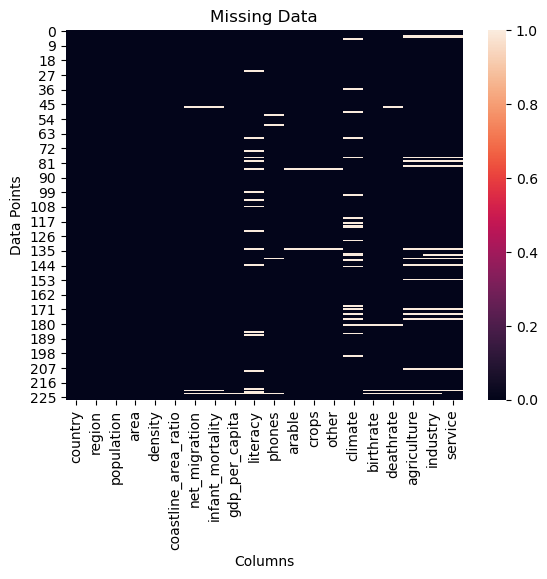

In [120]:
sns.heatmap(data.isnull()).set(title = 'Missing Data', xlabel = 'Columns', ylabel = 'Data Points')

We can see from above that we have some missing data points, but it is not extensive. 14/20 of our columns have missing data points, the maximum percentage of missing data is in the 'Climate' column, and it is less than 10% (22/227).

Later in the project we will deal with these missing data points, in the data cleaning section.

##### Data Validity Check

In order to have more certainty, we will pick a few countries and attributes (features) in random, and we will do some internet reseach to make sure the values in our data set is nottotally wrong.

Countries to check: Brazil, Cuba, Italy, Libya, Vietnam. The features we will check are: (p)opulation, (a)rea, (c)oastline/Area ratio, and (G)DP Source of information: https://www.jetpunk.com/info/countries-by-coastline, https://en.wikipedia.org/

From those sources:
Brazil: (p)210,147,125 (a)3,287,956 (c)0.0035 (G)17,016
Cuba: (p)011,209,628 (a)00042,426 (c)0.0842 (G)08,822
Italy: (p)060,317,116 (a)00116,350 (c)0.0321 (G)40,470
Libya: (p)006,871,292 (a)00679,363 (c)0.0016 (G)07,803
Vietnam: (p)095,545,962 (a)00127,882 (c)0.0280 (G)08,066

Now let's compare those values to the ones we have in our data set:

In [121]:
data.loc[[27,51, 101, 118, 219], ['country', 'population', 'area', 'coastline_area_ratio', 'gdp_per_capita']]

,country,population,area,coastline_area_ratio,gdp_per_capita
27,Brazil,188078227,8511965,0.09,7600.0
51,Cuba,11382820,110860,3.37,2900.0
101,Italy,58133509,301230,2.52,26700.0
118,Libya,5900754,1759540,0.10,6400.0
219,Vietnam,84402966,329560,1.05,2500.0


From this quick inspection above, we can see that our data set is a bit old. GDP and Population are a few years old (not updated), while the area and costline ratio are actually in Km and not miles as mentioned in the colum names.

We will use the dataset anyway, just keep in mind that untils for distance is Km not miles, and for area Km2 not sq. mi.

##### Investigating undefined features

We need to understand what different values in the Climate, agriculture, industry, and service columns refer to.

In [122]:
data.loc[:, ['country', 'region', 'climate', 'agriculture', 'industry', 'service']].head()

,country,region,climate,agriculture,industry,service
0,Afghanistan,ASIA (EX. NEAR EAST),1.0,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3.0,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,1.0,0.101,0.600,0.298
3,American Samoa,OCEANIA,2.0,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,3.0,NaN,NaN,NaN


It is clear here that the values in (agriculture, industry, and service) columns are the percentages those different sectors in the economic activity in each country.
For example: agriculture is generating 38% of Afganistan's GDP, industry generates 24%, while service generates 38%; the total is 100%.

Now we still have to understand the climate column, let's continue our invistigation:

In [123]:
data.climate.unique()

array([1. , 3. , 2. , nan, 4. , 1.5, 2.5])

In [124]:
h1 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1].head()
h2 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2].head()
h3 = data.loc[:, ['country', 'region', 'climate']][data.climate == 3].head()
h4 = data.loc[:, ['country', 'region', 'climate']][data.climate == 4].head()
h5 = data.loc[:, ['country', 'region', 'climate']][data.climate == 1.5].head()
h6 = data.loc[:, ['country', 'region', 'climate']][data.climate == 2.5].head()
pd.concat([h1, h2, h3, h4, h5, h6])

,country,region,climate
0,Afghanistan,ASIA (EX. NEAR EAST),1.0
2,Algeria,NORTHERN AFRICA,1.0
11,Australia,OCEANIA,1.0
13,Azerbaijan,C.W. OF IND. STATES,1.0
15,Bahrain,NEAR EAST,1.0
3,American Samoa,OCEANIA,2.0
6,Anguilla,LATIN AMER. & CARIB,2.0
7,Antigua & Barbuda,LATIN AMER. & CARIB,2.0
10,Aruba,LATIN AMER. & CARIB,2.0
14,"Bahamas, The",LATIN AMER. & CARIB,2.0


So, along with nan (representing missing data), climate has 6 unique values, and they are: 1, 1.5, 2, 2.5, 3, and 4. our observations:

1. Countries with mostly desert/hot climate have 1
2. Countries with mostly tropical climate have 2
3. Countries with mostly cold/cool Climate have 3
4. Countries with Climate almost equally divided between hot and tropical have 1.5
5. Countries with Climate almost equally divided between cold and tropical have 2.5
6. Countries under 'Climate' = 4, are also belonging to cold/cool climate group; It is not metioned in the dataset source why this group is separate from group 3 ; yet we will compine both groups together in the data cleaning section of the project.
7. There are 22 countries with null values for the climate column, those will be replaces by 0 in a later step, where 0 will represent 'unknown' value.

## Data Cleaning

##### Missing Data

In [125]:
print(data.isnull().sum()*100/len(data))

country                 0.000000
region                  0.000000
population              0.000000
area                    0.000000
density                 0.000000
coastline_area_ratio    0.000000
net_migration           1.321586
infant_mortality        1.321586
gdp_per_capita          0.440529
literacy                7.929515
phones                  1.762115
arable                  0.881057
crops                   0.881057
other                   0.881057
climate                 9.691630
birthrate               1.321586
deathrate               1.762115
agriculture             6.607930
industry                7.048458
service                 6.607930
dtype: float64


1. net_migration: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
2. infant_mortality: 3 missing data points. all of them belong to very small nations. We will put zero for those 3. 
3. gdp_per_capita: 1 missing value. West Sahara, from internet search, their gdp per capita is $2500, and we will put this value into our data set. 
4. literacy: 18 missing values, replaces by the mean literacy of each missing value's region.
5. phones: 4 missing values, replaces by the mean phones of each missing value's region.
6. arable, crops, and other: 2 missing values of very small islands, replace with zero.
7. climate: 22 missing, replace with 0, where zero will represent a 'unknown' value. 
8. birthrate, and deathrate: 3 missing, replace with their region's mean rates, since those rates are per 1000, and not population related. 
9. agricultue, industry, and service: 15 missing values, all belong to very small island nations. After inspection for similar nations, we found that those kind of nations usually have economies that rely heavily on services, with some agricultural and industrial activities. So we will replace the missing values with tthe following: agricultue = 0.15, industry = 0.05. service = 0.8. 

In [126]:
data['net_migration'].fillna(0, inplace=True)
data['infant_mortality'].fillna(0, inplace=True)
data['gdp_per_capita'].fillna(2500, inplace=True)
data['literacy'].fillna(data.groupby('region')['literacy'].transform('mean'), inplace= True)
data['phones'].fillna(data.groupby('region')['phones'].transform('mean'), inplace= True)
data['arable'].fillna(0, inplace=True)
data['crops'].fillna(0, inplace=True)
data['other'].fillna(0, inplace=True)
data['climate'].fillna(0, inplace=True)
data['birthrate'].fillna(data.groupby('region')['birthrate'].transform('mean'), inplace= True)
data['deathrate'].fillna(data.groupby('region')['deathrate'].transform('mean'), inplace= True)
data['agriculture'].fillna(0.17, inplace=True)
data['service'].fillna(0.8, inplace=True)
data['industry'].fillna((1 - data['agriculture'] - data['service']), inplace= True)

Let's check our missing data if any: 

In [127]:
print(data.isnull().sum())

country                 0
region                  0
population              0
area                    0
density                 0
coastline_area_ratio    0
net_migration           0
infant_mortality        0
gdp_per_capita          0
literacy                0
phones                  0
arable                  0
crops                   0
other                   0
climate                 0
birthrate               0
deathrate               0
agriculture             0
industry                0
service                 0
dtype: int64


No missing data anymore.

## EDA

##### Correlation heatmap

/var/folders/b2/q0fl6l4x5935x8hxczygvxcr0000gn/T/ipykernel_865/2851826795.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


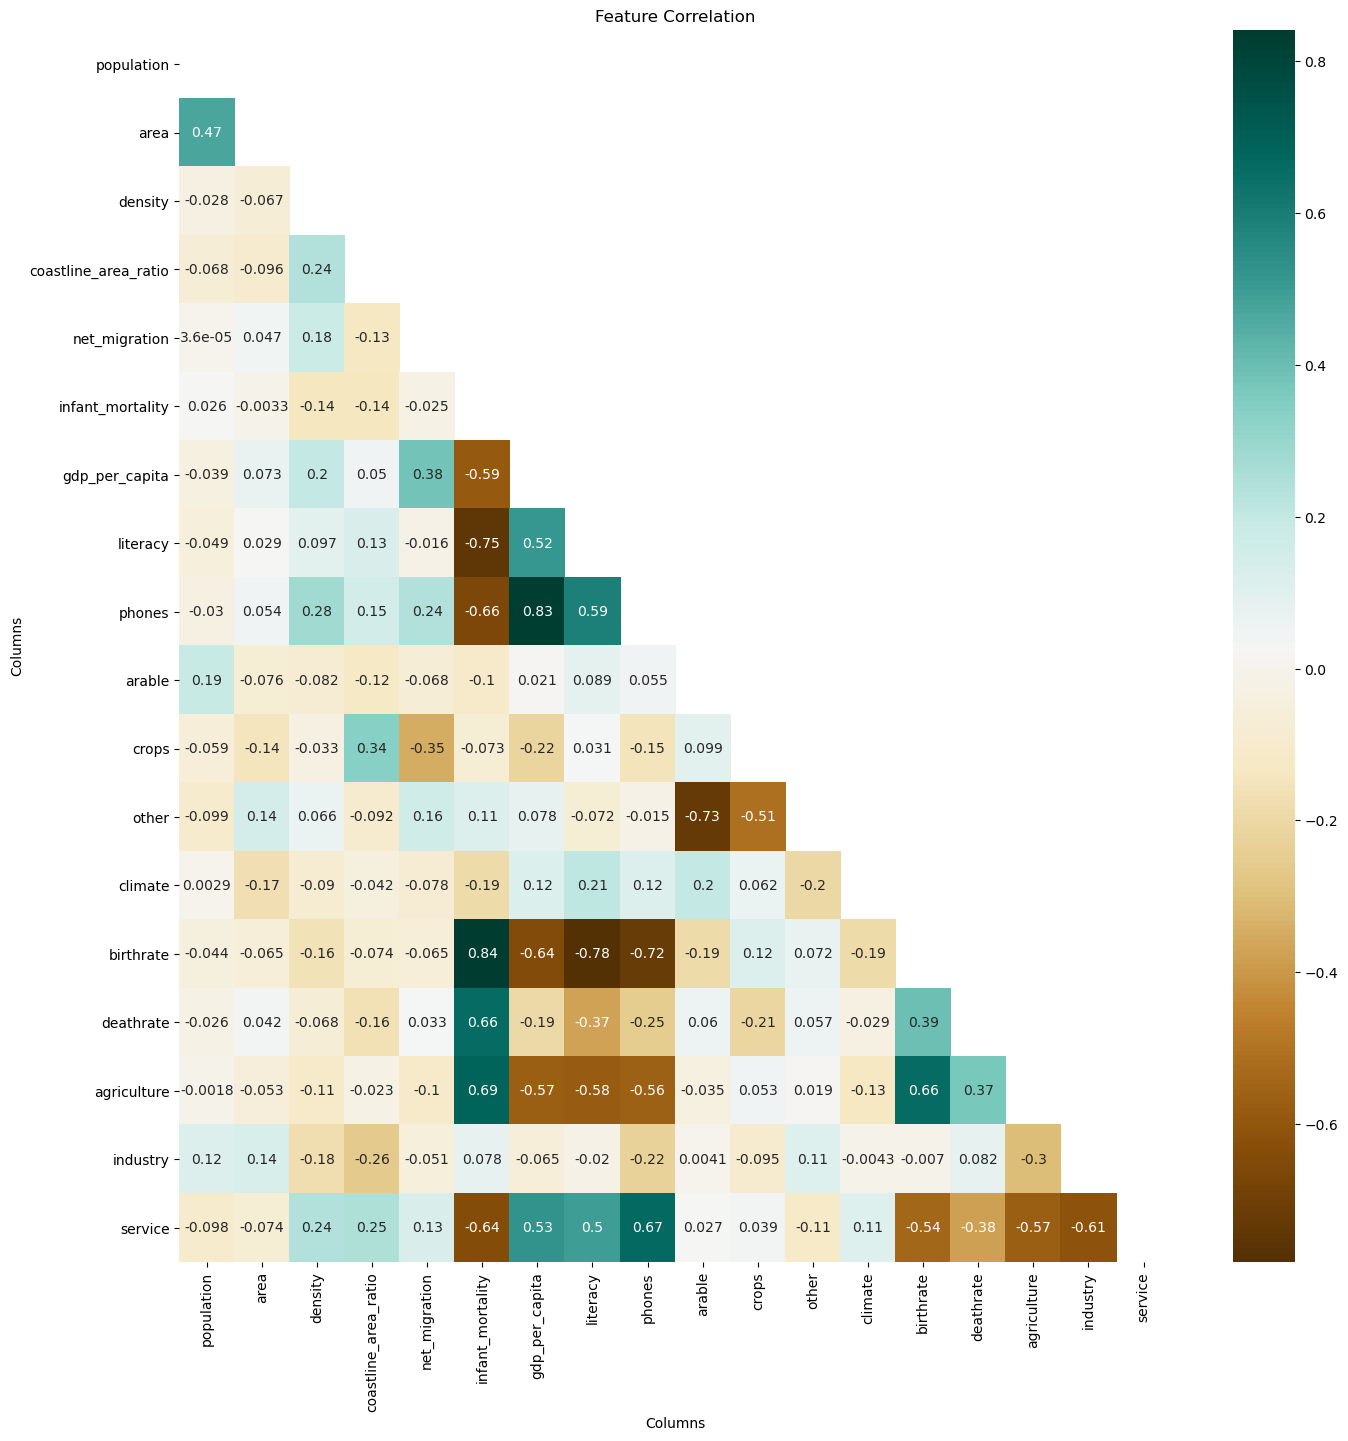

In [132]:
fig, ax = plt.subplots(figsize=(16,16)) 
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(), mask = mask,annot=True, ax=ax, cmap='BrBG').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

Some insights from the above correlation heatmap: 
1. expected strong correlation between infant_mortality and birthrate
2. unexpected strong correlation between infant_mortality and agriculture
3. expected strong correlation between infant_mortality and literacy
4. expected strong correlation between gdp_per_capita and phones
5. expected strong correlation between arable and other (other than crops) 
6. expected strong correlation between birthrate and literacy (the less literacy the higher the birthrate) 
7. unexpected strong correlation between birthrate and phones

let's now show correlation among a few of our features

Variables that have a correlation of under 0.3 with gdp_per_capita: 
* population 
* area
* coastline_area_ratio
* arable
* crops
* other
* climate
* deathrate 
* industry

Variables that have a correlation of over 0.3 with gdp_per_capita: 
* desity
* net_migration
* infant mortality
* literacy
* phones
* birthrate
* agriculture
* service

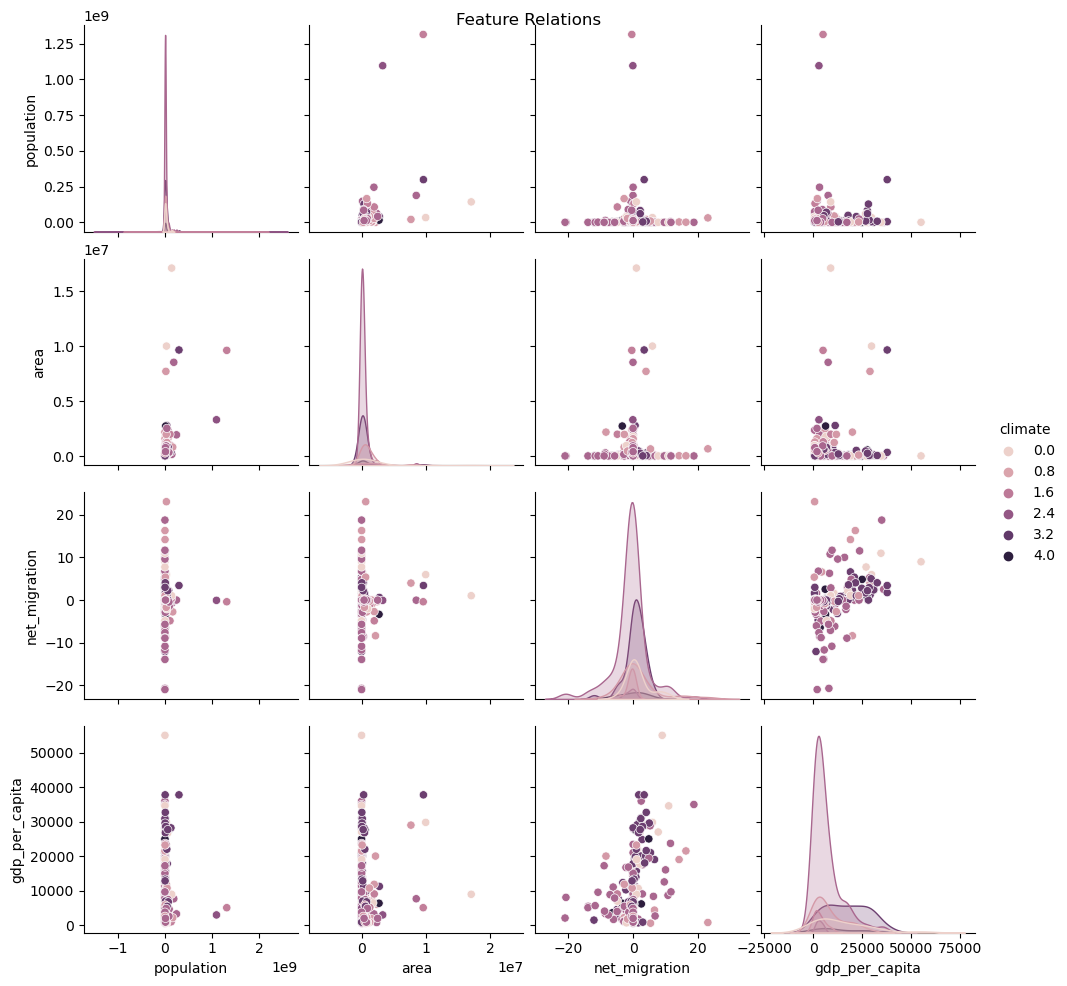

In [24]:
g = sns.pairplot(data[['population', 'area', 'net_migration', 'gdp_per_capita', 'climate']], hue='climate')
g.fig.suptitle('Feature Relations')
plt.show()

We can see a fair correlation between GDP and migration, which makes sense, since migrants tend to move to countries with better opportunities and higher GDP per capita.

##### Regional Analysis

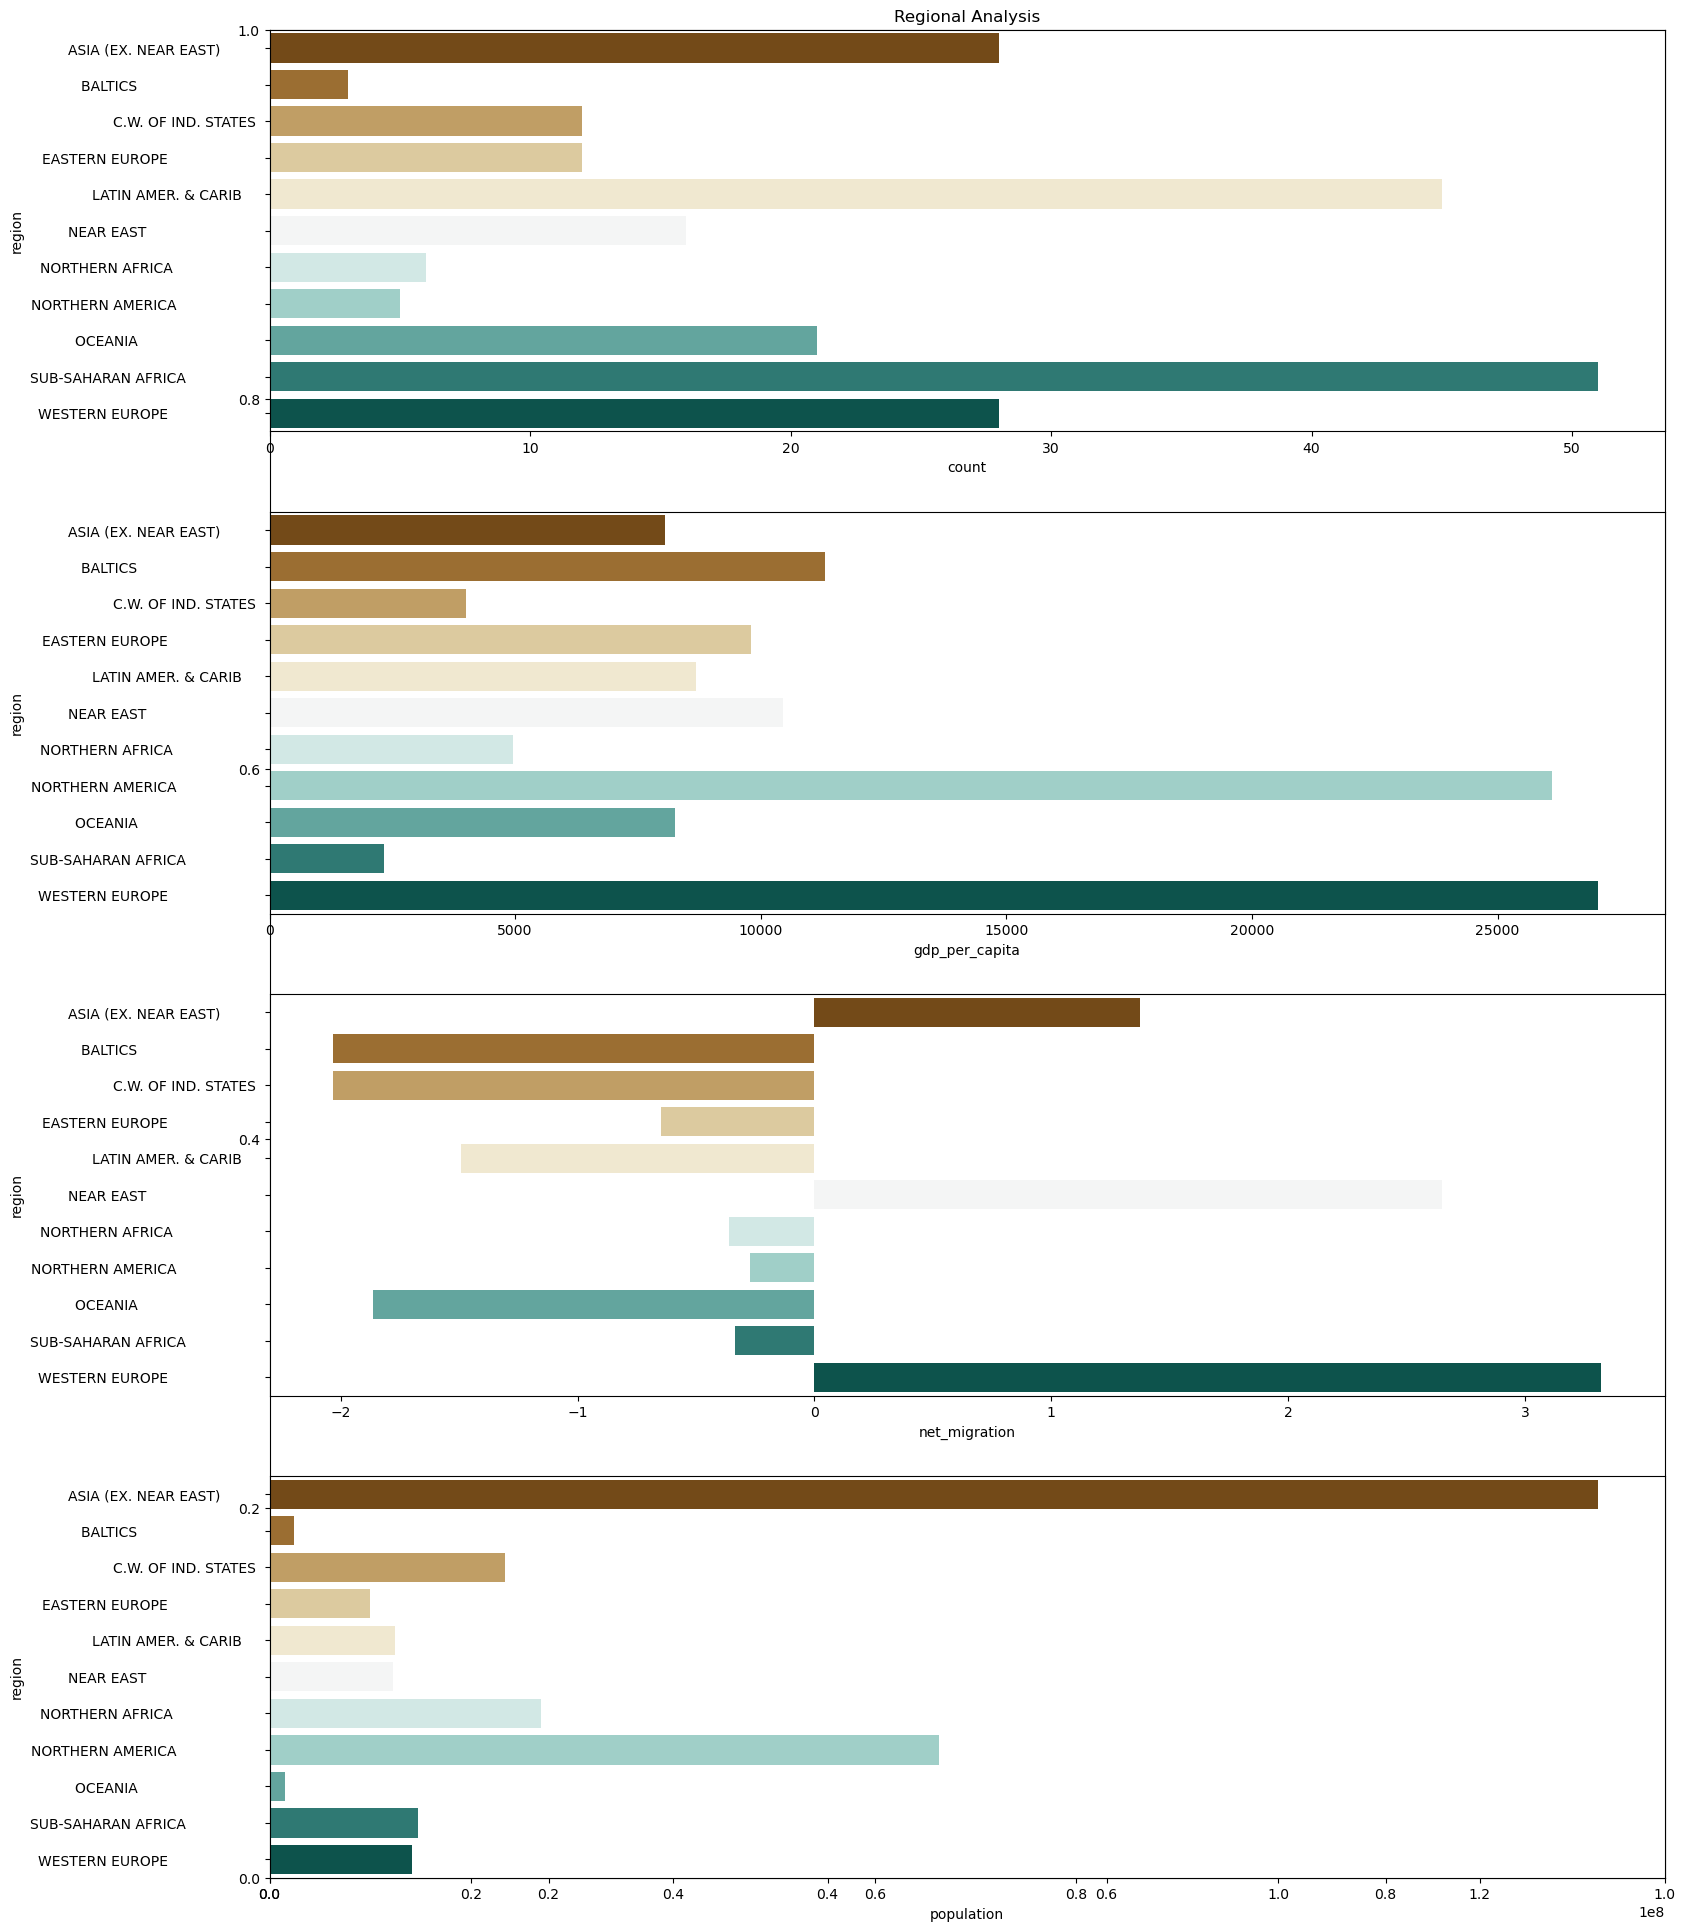

In [25]:
fig = plt.figure(figsize=(18, 24))
plt.title('Regional Analysis')
ax1 = fig.add_subplot(4, 1, 1)
ax2 = fig.add_subplot(4, 1, 2)
ax3 = fig.add_subplot(4, 1, 3)
ax4 = fig.add_subplot(4, 1, 4)
sns.countplot(data= data, y= 'region', ax= ax1, palette='BrBG')
sns.barplot(data= data, y= 'region', x= 'gdp_per_capita', ax= ax2, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'net_migration', ax= ax3, palette='BrBG', ci= None)
sns.barplot(data= data, y= 'region', x= 'population', ax= ax4, palette='BrBG', ci= None)
plt.show()

From the above figures, we can notice the following: 

1. Sub-Saharian Africa and Latin America regions have the most countries within them. 
2. Western Europe and North America have the highest GDP per capita, while Sub-Saharian Africa has the lowest GDP per capita.
3. Asia, North America, and North Europe, are the main regions where migrants from other regions go. 
4. Asia has the largest population, Oceania has the smallest. 

##### GDP Analysis

The figure below shows the regional ranking according to the average GDP per capita. As expected, North America and Western Europe have the highest GDP per capita, while Sub Saharian Africa has the lowest, and that may describes the large migration trends in the world in the past decade.

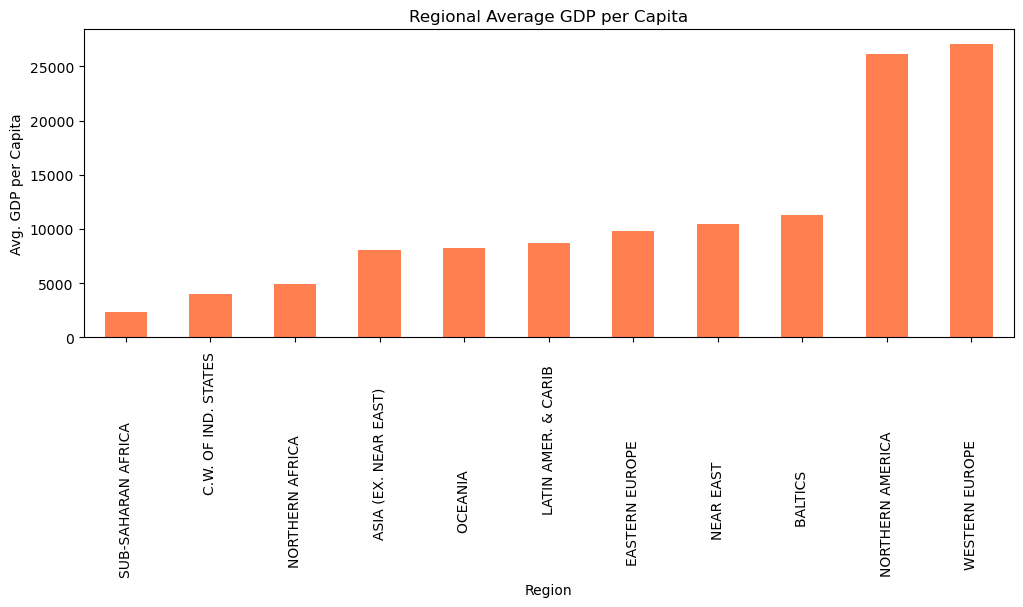

In [26]:
fig = plt.figure(figsize=(12, 4))
data.groupby('region')['gdp_per_capita'].mean().sort_values().plot(kind='bar', color='coral')
plt.title('Regional Average GDP per Capita')
plt.xlabel("Region")
plt.ylabel('Avg. GDP per Capita')
plt.show()

<Figure size 1200x1200 with 0 Axes>

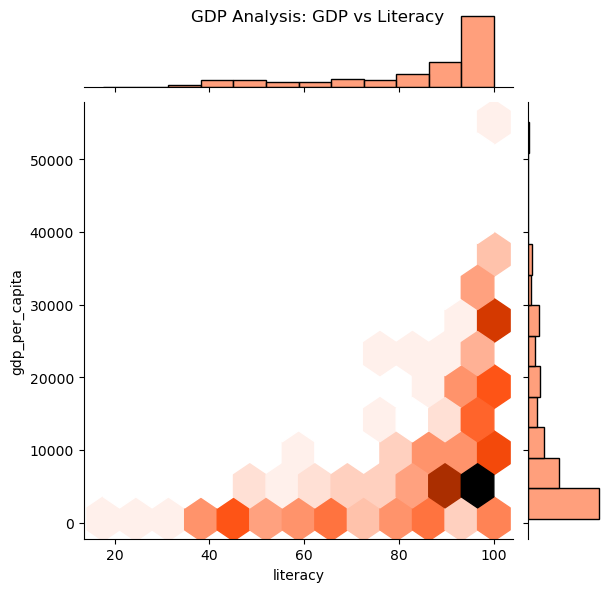

In [141]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'literacy', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.suptitle('GDP Analysis: GDP vs Literacy')
plt.show()

From the above figure, it is clear that the higher the country's GDP, the more literate the population is, and vive versa

<Figure size 1200x1200 with 0 Axes>

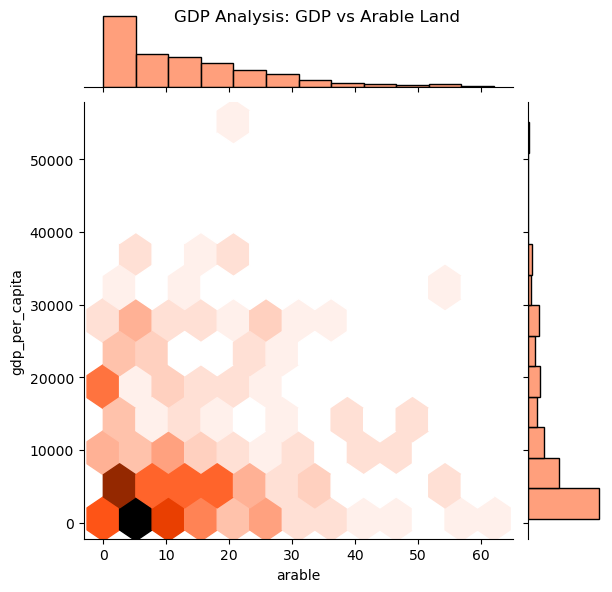

In [142]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'arable', y= 'gdp_per_capita', kind= 'hex', color='coral')
plt.suptitle('GDP Analysis: GDP vs Arable Land')
plt.show()

No clear relationship between GDP and percentage of arable land, an indecation that agriculture is not the strongest factor economically, as it used to be for the most of the human history in the last 60000 years.

<Figure size 1200x1200 with 0 Axes>

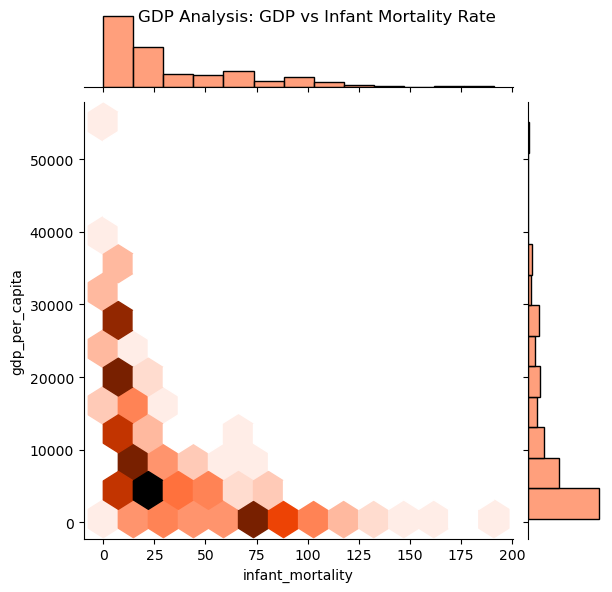

In [143]:
fig = plt.figure(figsize=(12, 12))
sns.jointplot(data= data, x= 'infant_mortality', y= 'gdp_per_capita', kind= 'hex',color='coral')
plt.suptitle('GDP Analysis: GDP vs Infant Mortality Rate')
plt.show()

from the figure above, it is very clear that poor countries suffer more from infant mortality.

## Data Pre-Conditioning

In this section we will make our data ready for model training. This will include: 
1. Transform 'region' column into numerical values. 
2. Split data set into training and testing parts (80/20), while dropping the countries column (string, and not going to be used to train the models), and separating gdp_per_capita column, where it will be used as labels. 
3. We will try different splits of our dataset (with/without feature selection, with/without feature scaling.

##### Region Transform

In [30]:
data_final = pd.concat([data,pd.get_dummies(data['region'], prefix='region')], axis=1).drop(['region'],axis=1)
print(data_final.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 30 columns):
 #   Column                                      Non-Null Count  Dtype   
---  ------                                      --------------  -----   
 0   country                                     227 non-null    category
 1   population                                  227 non-null    int64   
 2   area                                        227 non-null    int64   
 3   density                                     227 non-null    float64 
 4   coastline_area_ratio                        227 non-null    float64 
 5   net_migration                               227 non-null    float64 
 6   infant_mortality                            227 non-null    float64 
 7   gdp_per_capita                              227 non-null    float64 
 8   literacy                                    227 non-null    float64 
 9   phones                                      227 non-null    float64 
 10  ar

In [31]:
data_final.head()

,country,population,area,density,coastline_area_ratio,net_migration,infant_mortality,gdp_per_capita,literacy,phones,...,region_BALTICS,region_C.W. OF IND. STATES,region_EASTERN EUROPE,region_LATIN AMER. & CARIB,region_NEAR EAST,region_NORTHERN AFRICA,region_NORTHERN AMERICA,region_OCEANIA,region_SUB-SAHARAN AFRICA,region_WESTERN EUROPE
0,Afghanistan,31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,...,0,0,0,0,0,0,0,0,0,0
1,Albania,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,...,0,0,1,0,0,0,0,0,0,0
2,Algeria,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,...,0,0,0,0,0,1,0,0,0,0
3,American Samoa,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,...,0,0,0,0,0,0,0,1,0,0
4,Andorra,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,...,0,0,0,0,0,0,0,0,0,1


##### Data Split 1: all of our final dataset, no scaling

In [32]:
y = data_final['gdp_per_capita']
X = data_final.drop(['gdp_per_capita','country'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

##### Data Split 2: all of our final dataset, with scaling

In [33]:
sc_X = StandardScaler()

X2_train = sc_X.fit_transform(X_train)
X2_test = sc_X.fit_transform(X_test)
y2_train = y_train
y2_test = y_test

##### Data Split 3: feature selected dataset, no scaling

We will select only a portion of our features, the ones with corelation score larger than -/+ 0.3 with gdp_per_capita:
* desity
* net_migration
* infant mortality
* literacy
* phones
* birthrate
* agriculture
* service

In [102]:
y3 = y
X3 = data_final.drop(['gdp_per_capita','country','population', 'area', 'coastline_area_ratio', 'arable',
                      'crops', 'other', 'climate', 'deathrate', 'industry'], axis=1)

X3_train, X3_test, y3_train, y3_test = train_test_split(X3, y3, test_size=0.2, random_state=101)

##### Data Split 4: feature selected dataset, with scaling

In [103]:
sc_X4 = StandardScaler()

X4_train = sc_X4.fit_transform(X3_train)
X4_test = sc_X4.fit_transform(X3_test)
y4_train = y3_train
y4_test = y3_test

## Linear Regression

From our EDA, we can see that most features do not have a linear relationship with our labels (gdp_per_capita), yet we will try linear regression, and use the result as a reference (other methods should have better results).

##### Model Training

In [104]:
lm1 = LinearRegression()
lm1.fit(X_train,y_train)

lm2 = LinearRegression()
lm2.fit(X2_train,y2_train)

lm3 = LinearRegression()
lm3.fit(X3_train,y3_train)

lm4 = LinearRegression()
lm4.fit(X4_train,y4_train)

LinearRegression()

##### Predictions

In [105]:
lm1_pred = lm1.predict(X_test)
lm2_pred = lm2.predict(X2_test)
lm3_pred = lm3.predict(X3_test)
lm4_pred = lm4.predict(X4_test)

##### Evaluation

In [148]:
print('Linear Regression Performance:')

lr_results = pd.DataFrame({'All_Features_No_Scaling': [metrics.mean_absolute_error(y_test, lm1_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, lm1_pred)),
                                          metrics.r2_score(y_test, lm1_pred)], 
              'All_Features_With_Scaling': [metrics.mean_absolute_error(y_test, lm2_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, lm2_pred)),
                                          metrics.r2_score(y_test, lm2_pred)], 
              'Selected_Features_No_Scaling': [metrics.mean_absolute_error(y_test, lm3_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, lm3_pred)),
                                          metrics.r2_score(y_test, lm3_pred)], 
              'Selected_Features_With_Scaling': [metrics.mean_absolute_error(y_test, lm4_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, lm4_pred)),
                                          metrics.r2_score(y_test, lm4_pred)]}, 
             index=['MAE', 'MSE', 'R2_Score'])

lr_results

Linear Regression Performance:


,All_Features_No_Scaling,All_Features_With_Scaling,Selected_Features_No_Scaling,Selected_Features_With_Scaling
MAE,3.303509e+05,5.690195e+05,2965.935723,2879.521324
MSE,1.570338e+06,1.283171e+06,4088.794580,3756.436589
R2_Score,-2.984312e+04,-1.992599e+04,0.797669,0.829225


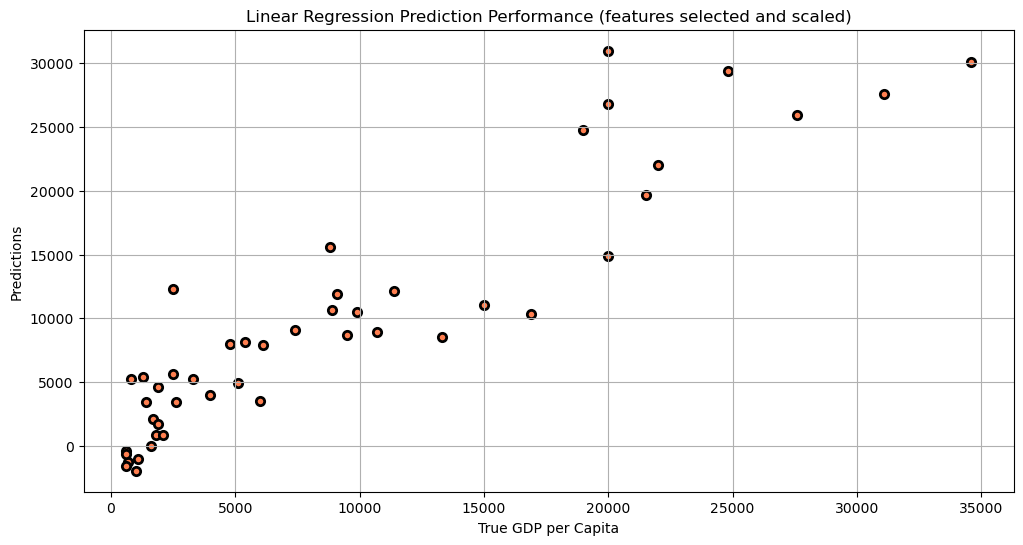

In [149]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,lm4_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Linear Regression Prediction Performance (features selected and scaled)') 
plt.grid()
plt.show()

From the metrics above, it is clear that feature selection is essintial for linear regression model training, in order to get acceptable results on this dataset. On the other hand, feature scaling has a small positive effect on LR's prediction performance.
we got decent prediction performance from LR with feature selection and scaling.

## SVM

##### Model Training

In [39]:
svm1 = SVR(kernel='rbf')
svm1.fit(X_train,y_train)

svm2 = SVR(kernel='rbf')
svm2.fit(X2_train,y2_train)

svm3 = SVR(kernel='rbf')
svm3.fit(X3_train,y3_train)

svm4 = SVR(kernel='rbf')
svm4.fit(X4_train,y4_train)

SVR()

##### Predictions

In [40]:
svm1_pred = svm1.predict(X_test)
svm2_pred = svm2.predict(X2_test)
svm3_pred = svm3.predict(X3_test)
svm4_pred = svm4.predict(X4_test)

##### Evaluation

In [150]:
print('SVM Performance:')

svm_results = pd.DataFrame({'All_Features_No_Scaling': [metrics.mean_absolute_error(y_test, svm1_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, svm1_pred)),
                                          metrics.r2_score(y_test, svm1_pred)], 
              'All_Features_With_Scaling': [metrics.mean_absolute_error(y_test, svm2_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, svm2_pred)),
                                          metrics.r2_score(y_test, svm2_pred)], 
              'Selected_Features_No_Scaling': [metrics.mean_absolute_error(y_test, svm3_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, svm3_pred)),
                                          metrics.r2_score(y_test, svm3_pred)], 
              'Selected_Features_With_Scaling': [metrics.mean_absolute_error(y_test, svm4_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, svm4_pred)),
                                          metrics.r2_score(y_test, svm4_pred)]}, 
             index=['MAE', 'MSE', 'R2_Score'])

svm_results

SVM Performance:


,All_Features_No_Scaling,All_Features_With_Scaling,Selected_Features_No_Scaling,Selected_Features_With_Scaling
MAE,7049.984895,7042.737597,7047.711927,7040.043821
MSE,9811.736313,9800.406047,9807.997922,9794.588865
R2_Score,-0.165103,-0.162414,-0.164216,-0.161035


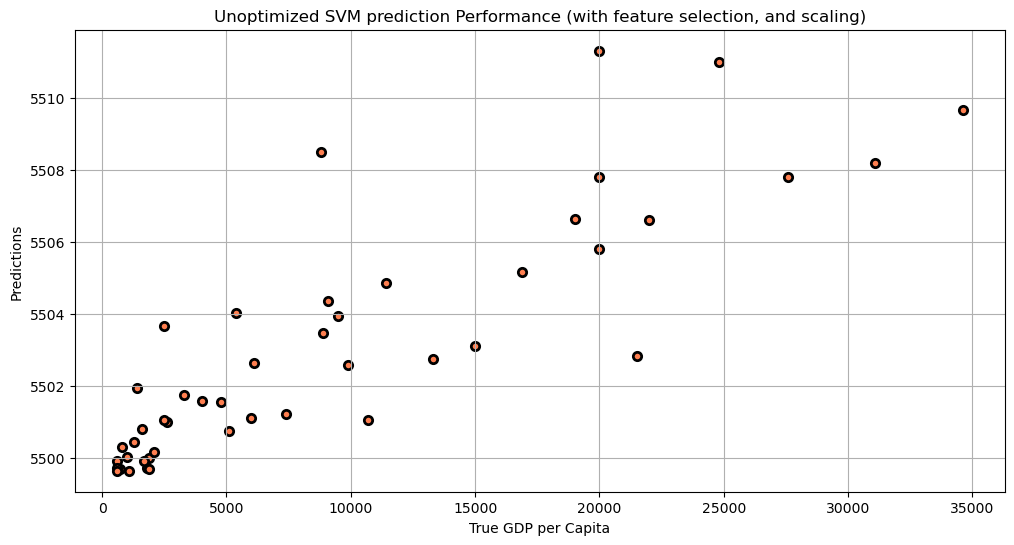

In [151]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y3_test,svm3_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Unoptimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

Feature scaling, and feature selection, made almost no difference in the prediction performance of the SVM algorithm. 

The results of SVM is worse than that of Linear Regression, so we will try to improve SVM's performance by optimizing its parameters using grid search.

##### Optimizing SVM

In [152]:
param_grid = {'C': [1, 10, 100], 'gamma': [0.01,0.001,0.0001], 'kernel': ['rbf']} 
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=3)
grid.fit(X4_train,y4_train)
grid_predictions = grid.predict(X4_test)
print('Best Parameters:',grid.best_params_)
print('Best Estimator:',grid.best_estimator_)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.1s
[CV 2/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=1, gamma=0.001, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1, gamma=0.0001, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1, gamma=0.0001,

MAE: 6386.413128432553
RMSE: 9133.499345710767
R2_Score:  -0.009594923559210988


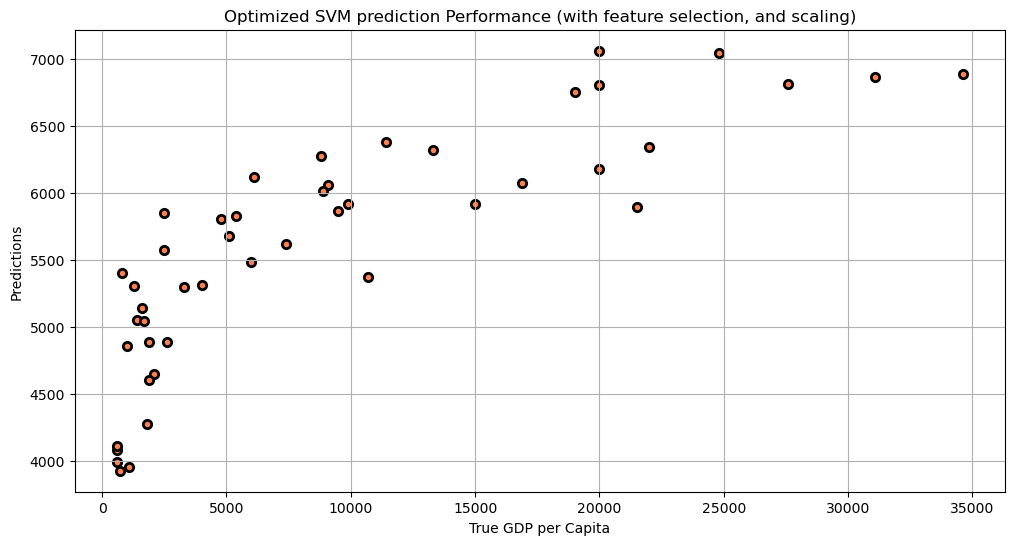

In [47]:
print('MAE:', metrics.mean_absolute_error(y4_test, grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y4_test, grid_predictions)))
print('R2_Score: ', metrics.r2_score(y4_test, grid_predictions))

fig = plt.figure(figsize=(12, 6))
plt.scatter(y4_test,grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized SVM prediction Performance (with feature selection, and scaling)') 
plt.grid()
plt.show()

SVM has improved a little with grid search, but it still performs below linear regression.

## Random Forest

Let's first try random forest with our data splits (with and without feature selection). Scaling is not going to be tested for Random Forest, since it should not affect this algorithm's performance. later we will try to improve its performance.

##### Training

In [48]:
rf1 = RandomForestRegressor(random_state=101, n_estimators=200)
rf3 = RandomForestRegressor(random_state=101, n_estimators=200)

rf1.fit(X_train, y_train)
rf3.fit(X3_train, y3_train)

RandomForestRegressor(n_estimators=200, random_state=101)

##### Prediction

In [49]:
rf1_pred = rf1.predict(X_test)
rf3_pred = rf3.predict(X3_test)

##### Evaluation

In [156]:
print('Random Forest Performance:')

rf_results = pd.DataFrame({'All_Features_No_Scaling': [metrics.mean_absolute_error(y_test, rf1_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, rf1_pred)),
                                          metrics.r2_score(y_test, rf1_pred)], 
              'Selected_Features_No_Scaling': [metrics.mean_absolute_error(y_test, rf3_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, rf3_pred)),
                                          metrics.r2_score(y_test, rf3_pred)]}, 
             index=['MAE', 'MSE', 'R2_Score'])

rf_results

Random Forest Performance:


,All_Features_No_Scaling,Selected_Features_No_Scaling
MAE,2142.130435,2416.065217
MSE,3097.194474,3533.590316
R2_Score,0.883906,0.848886


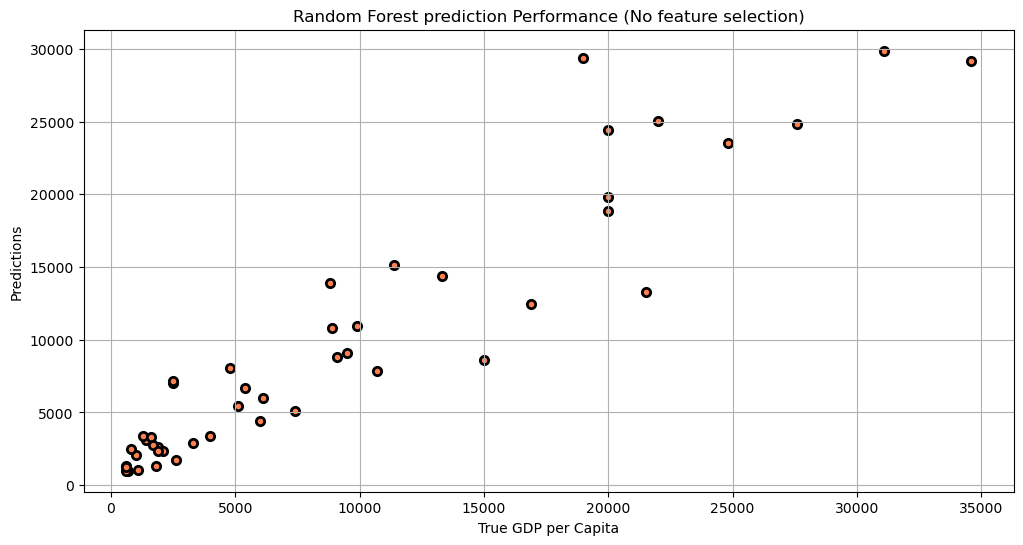

In [173]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

##### Optimization

We will use grid search in order to obtain good parameters for our RF regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are: 

* n-estimators 
* min_samples_leaf
* max_features
* bootstrap

In [172]:
rf_param_grid = {'max_features': ['sqrt', 'auto'],
              'min_samples_leaf': [1, 3, 5],
              'n_estimators': [100, 500, 1000],
             'bootstrap': [False, True]} 

rf_grid = GridSearchCV(estimator= RandomForestRegressor(), param_grid = rf_param_grid,  n_jobs=-1, verbose=0)
rf_grid.fit(X_train,y_train)
print('Best Parameters:', rf_grid.best_params_)
print('Best Estimators', rf_grid.best_estimator_)
rf_grid_predictions = rf_grid.predict(X_test)

Best Parameters: {'bootstrap': False, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'n_estimators': 1000}
Best Estimators RandomForestRegressor(bootstrap=False, max_features='sqrt', n_estimators=1000)


MAE: 2338.8869565217396
RMSE: 3248.8138900487843
R2_Score:  0.8722613209633789


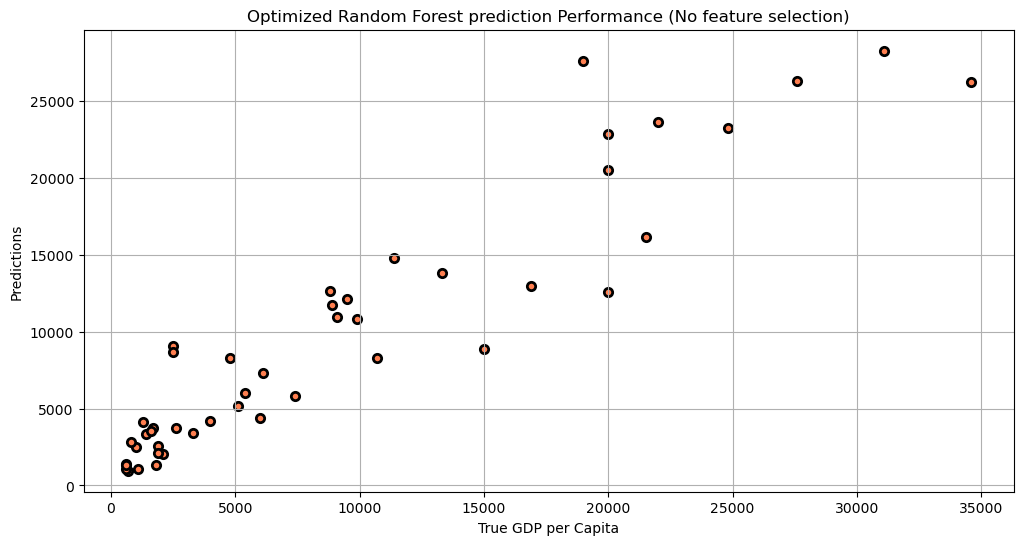

In [168]:
print('MAE:', metrics.mean_absolute_error(y_test, rf_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, rf_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,rf_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Random Forest prediction Performance (No feature selection)') 
plt.grid()
plt.show()

We can see that the optimization process on RF regressor has not changed the performance in a noticebale manner, yet the slight change was actually to the worst, that is probably because our initial parameters were already very close to the optimum ones.

## Gradient Boosting

##### Training

We will first traing the GBM regressor with the default parameter values, then we will try optimizing its parameters.

In [174]:
gbm1 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)
gbm3 = GradientBoostingRegressor(learning_rate=0.1, n_estimators=100, min_samples_split=2, min_samples_leaf=1, max_depth=3,
                                 subsample=1.0, max_features= None, random_state=101)

gbm1.fit(X_train, y_train)
gbm3.fit(X3_train, y3_train)

GradientBoostingRegressor(random_state=101)

##### Prediction

In [175]:
gbm1_pred = gbm1.predict(X_test)
gbm3_pred = gbm3.predict(X3_test)

##### Evaluation

In [178]:
print('Gradiant Boosting Performance:')

gbm_results = pd.DataFrame({'All_Features_No_Scaling': [metrics.mean_absolute_error(y_test, gbm1_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, gbm1_pred)),
                                          metrics.r2_score(y_test, gbm1_pred)], 
              'Selected_Features_No_Scaling': [metrics.mean_absolute_error(y_test, gbm3_pred), 
                                          np.sqrt(metrics.mean_squared_error(y_test, gbm3_pred)),
                                          metrics.r2_score(y_test, gbm3_pred)]}, 
             index=['MAE', 'MSE', 'R2_Score'])

gbm_results

Gradiant Boosting Performance:


,All_Features_No_Scaling,Selected_Features_No_Scaling
MAE,2280.462596,2467.208127
MSE,3413.635244,3789.297975
R2_Score,0.858971,0.826224


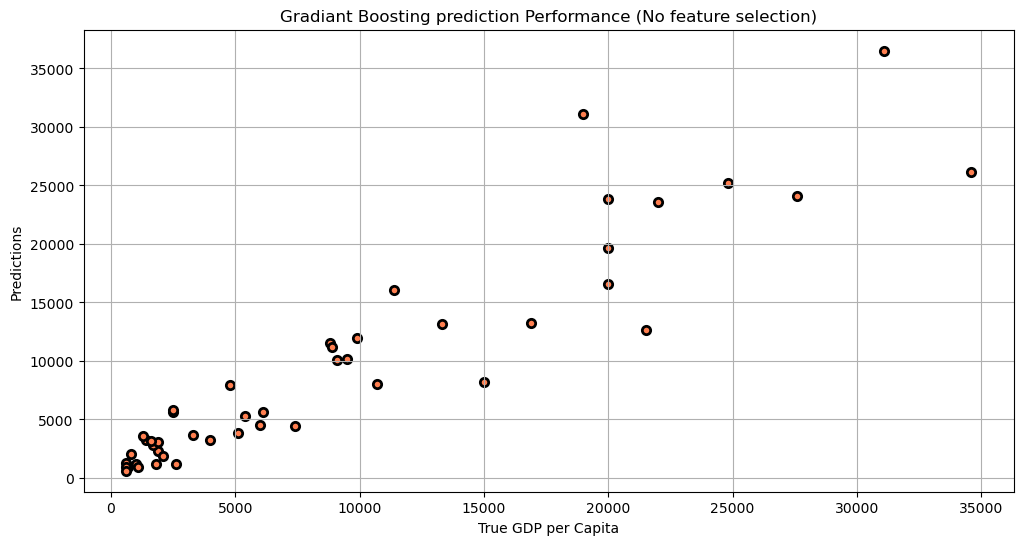

In [177]:
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm1_pred,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Gradiant Boosting prediction Performance (No feature selection)') 
plt.grid()
plt.show()

It is clear that Gradiant Boosting gave us good performance even before optimization. Its performance on our dataset is very close to that of Random Forest. 

##### Feature Importance

We can plot how the GBM regressor sees the importance of different features in the dataset. 

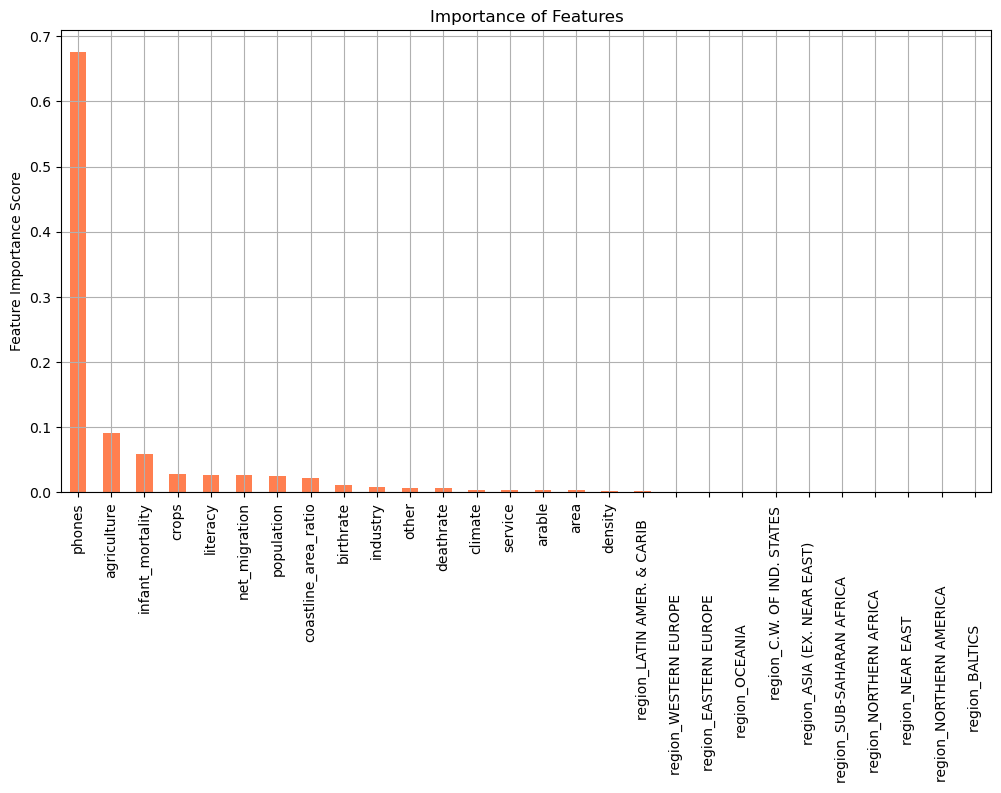

In [61]:
feat_imp = pd.Series(gbm1.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp.plot(kind='bar', title='Importance of Features', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

The number of phones seems to have the highest predictive power.

With this first model, we obtain an R2_Score of 0.8590, which is not very far behind that of Random Forest regressor. Next we will try to optimize GBM, and compare its performance to that of Random Forest and the one above. Also, we will plot the feature importance chart, and observe if GBM changed the features importance score after optimization. 

##### GBM Optimization

We will use grid search in order to obtain good parameters for our GBM regressor. Of course our optimization here will be limited due to time and computing power constraints. The parameters we will optimiz are:

* n-estimators: 100, 500, 1000
* learning_rate: 0.001, 0.01, 0.1, 1
* max_depth: 3, 5, 8
* subsample: 0.7, 1 (Values lower than 1 generally lead to a reduction of variance and an increase in bias)
* min_samples_leaf: 1, 20
* min_samples_split: 0.5-1% of our data --> we have 227 datapoints --> 10 -20
* max_features: 4, 7 (sqrt of number of features is a good guess) 


In [62]:
gbm_param_grid = {'learning_rate':[1,0.1, 0.01, 0.001], 
           'n_estimators':[100, 500, 1000],
          'max_depth':[3, 5, 8],
          'subsample':[0.7, 1], 
          'min_samples_leaf':[1, 20],
          'min_samples_split':[10, 20],
          'max_features':[4, 7]}

gbm_tuning = GridSearchCV(estimator =GradientBoostingRegressor(random_state=101),
                          param_grid = gbm_param_grid,
                          n_jobs=-1,
                          cv=5)

gbm_tuning.fit(X_train,y_train)
print(gbm_tuning.best_params_)

{'learning_rate': 0.01, 'max_depth': 5, 'max_features': 7, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 500, 'subsample': 0.7}


In [63]:
gbm_grid_predictions = gbm_tuning.predict(X_test)

MAE: 2362.9354066125907
RMSE: 3469.360881371261
R2_Score:  0.8543294671599899


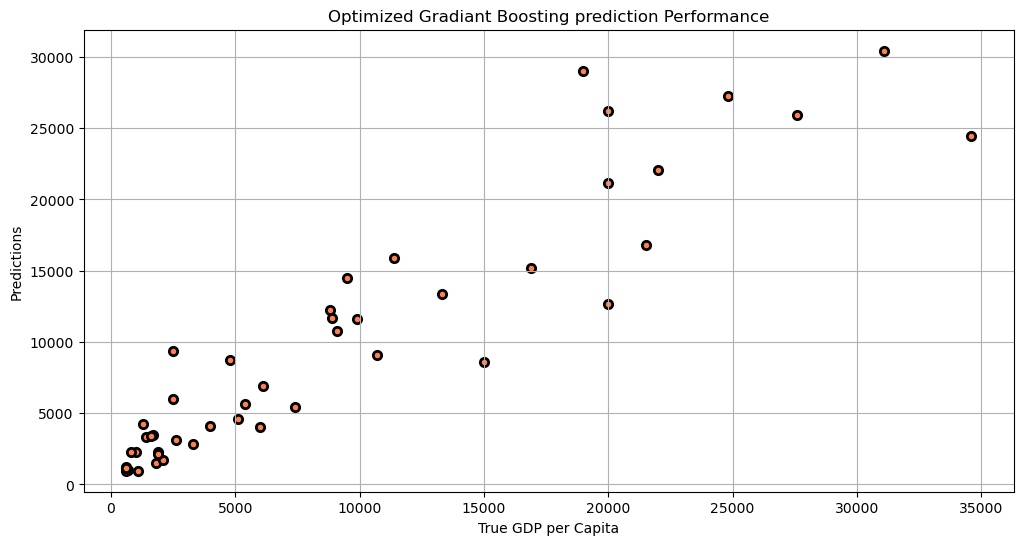

In [64]:
print('MAE:', metrics.mean_absolute_error(y_test, gbm_grid_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbm_grid_predictions)))
print('R2_Score: ', metrics.r2_score(y_test, gbm_grid_predictions))
fig = plt.figure(figsize=(12, 6))
plt.scatter(y_test,gbm_grid_predictions,color='coral', linewidths=2, edgecolors='k')
plt.xlabel('True GDP per Capita') 
plt.ylabel('Predictions') 
plt.title('Optimized Gradiant Boosting prediction Performance') 
plt.grid()
plt.show()

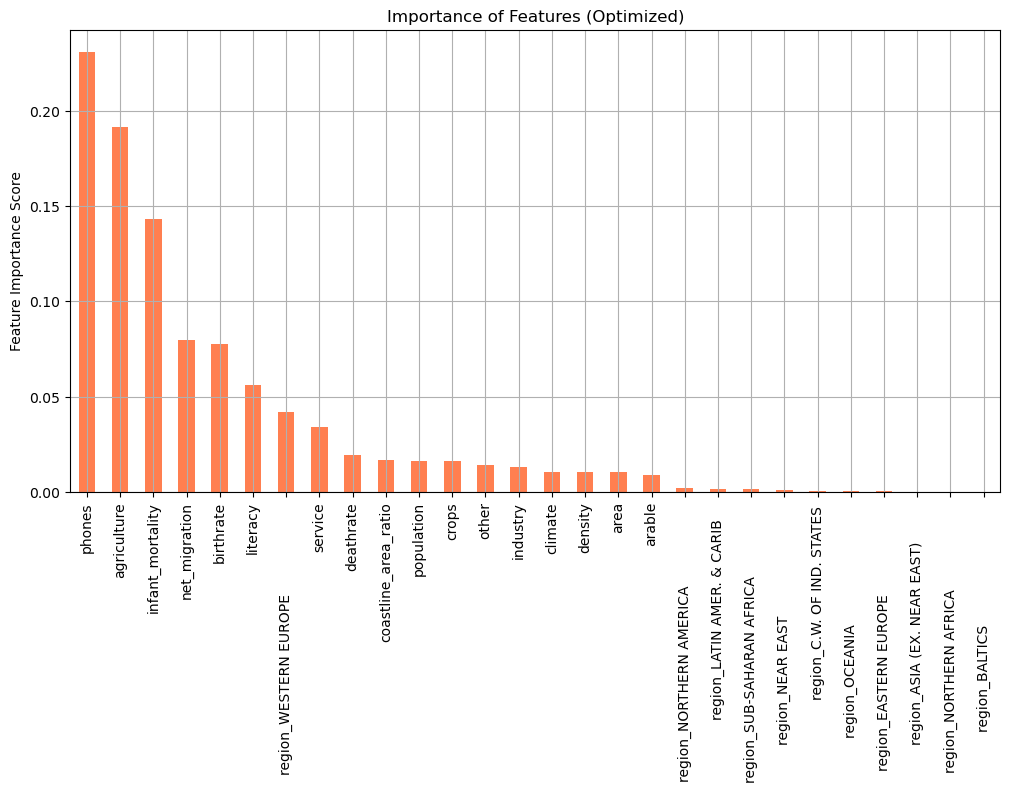

In [65]:
gbm_opt = GradientBoostingRegressor(learning_rate=0.01, n_estimators=500,max_depth=5, min_samples_split=10, min_samples_leaf=1, 
                                    subsample=0.7,max_features=7, random_state=101)
gbm_opt.fit(X_train,y_train)
feat_imp2 = pd.Series(gbm_opt.feature_importances_, list(X_train)).sort_values(ascending=False)
fig = plt.figure(figsize=(12, 6))
feat_imp2.plot(kind='bar', title='Importance of Features (Optimized)', color= 'coral')
plt.ylabel('Feature Importance Score')
plt.grid()
plt.show()

We can see that the grid search actually decreased the GBM performance a bit, the reason is that we could not extend the grid search limits, due to processing limits. Yet, we can notice that grid search resulted in a different features importance scores. In general, we can say that GBM has a similar performance to that of Random Forest on our dataset. 

## Conclusion

In this project, we used countries_of_the_world dataset to build a __GDP__ predictor. 4 different learning regressors (Linear Regression, SVM, Random Forest, and Gradiant Boosting) were tested, and we have acheived the best prediction performance using Random Forest, followed by Gradiant Boosting, and then Linear Regression, while SVM acheived the worst performance of the 4.

The best prediction performance was acheived using __Random Forest__ regressor, using all features in the dataset, and resulted in the following metrics: 
* Mean Absolute Error __(MAE)__: 2142.13
* Root mean squared error __(RMSE)__: 3097.19
* R-squared Score __(R2_Score)__:  0.8839

Taking into account that the gdp_per_capita values in the dataset ranges from 500 to 55100 USD. 

## Future Work

When time and processing power are available, we can try extending the ranges of Random Forest and Gradiant Boosting grid searches, and see if that gave us better performance than what we have achieved. 